## Model Training and Prediction for Power Consumption in 3 Different Zones of India

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('powerconsumption.csv')
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [3]:
X = df.drop(labels=['Temperature'],axis=1)
Y = df[['PowerConsumption_Zone1']]

In [4]:
# Segregating numerical and categorical variables
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns
print("Numerical colums:",numerical_cols)
print('Categorical Columns:',categorical_cols)

Numerical colums: Index(['Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows',
       'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3'],
      dtype='object')
Categorical Columns: Index(['Datetime'], dtype='object')


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

## Visualization of Power Consumption

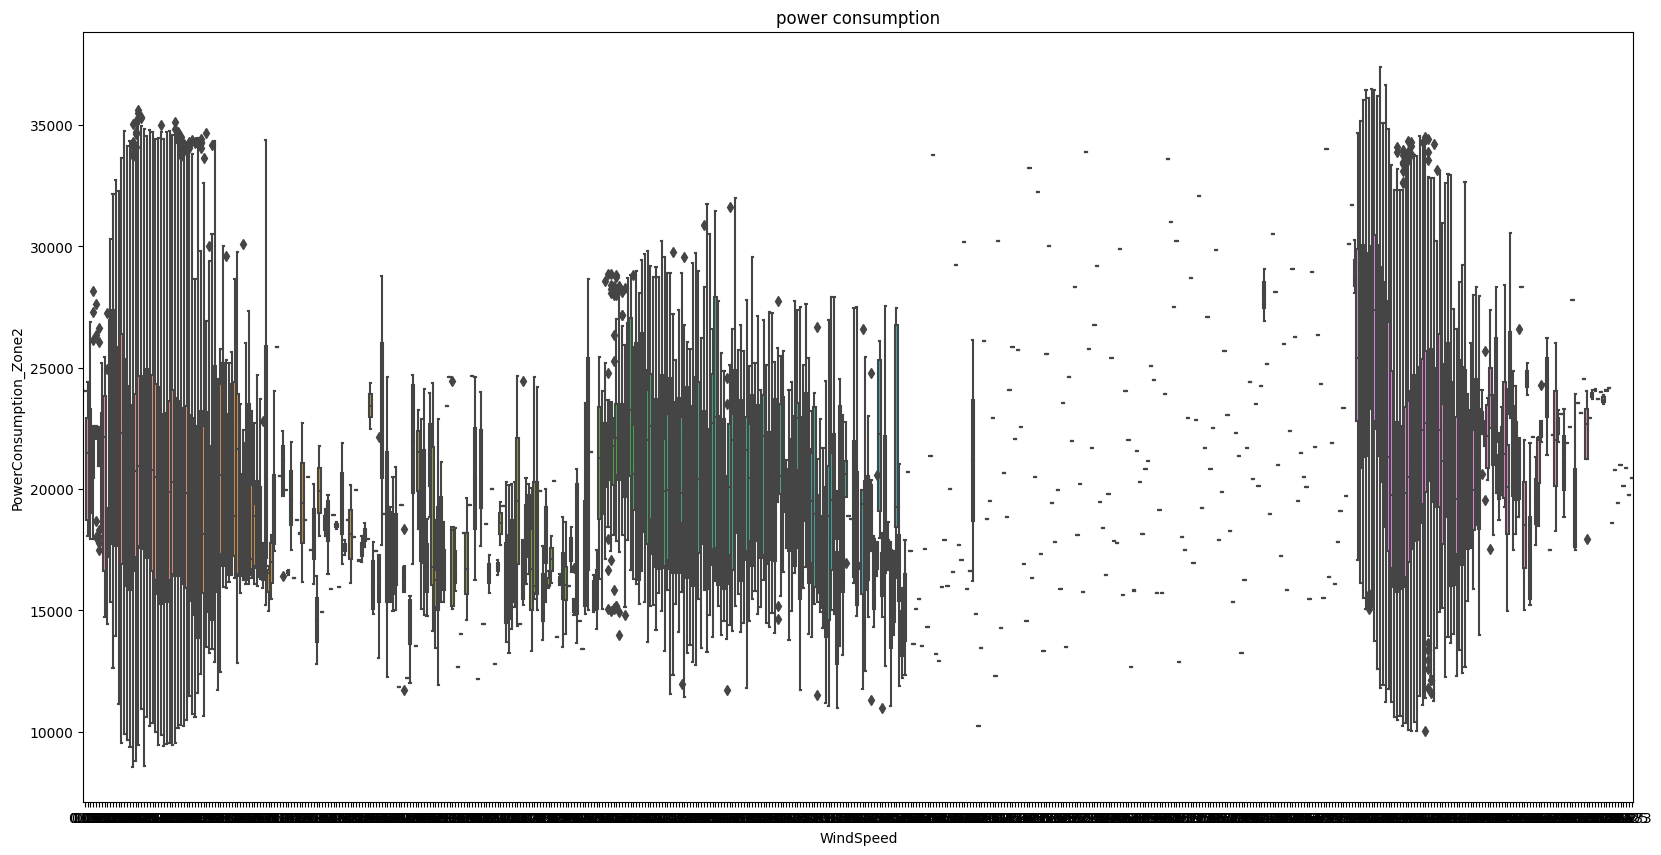

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df, x ='WindSpeed', y='PowerConsumption_Zone2')
ax.set_title('power consumption')
plt.show()

In [7]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

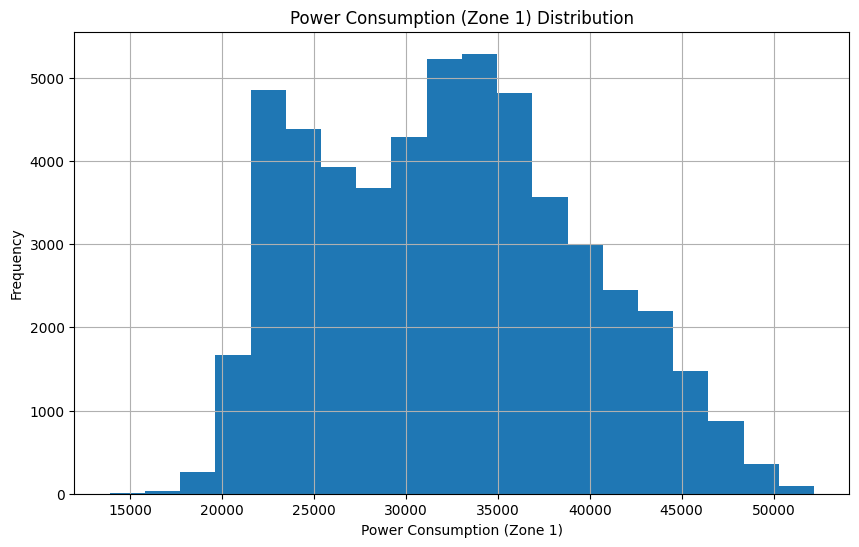

In [8]:
# Plot 2: Histogram for power consumption distribution
plt.figure(figsize=(10, 6))
plt.hist(df['PowerConsumption_Zone1'], bins=20)
plt.xlabel('Power Consumption (Zone 1)')
plt.ylabel('Frequency')
plt.title('Power Consumption (Zone 1) Distribution')
plt.grid(True)
plt.show()

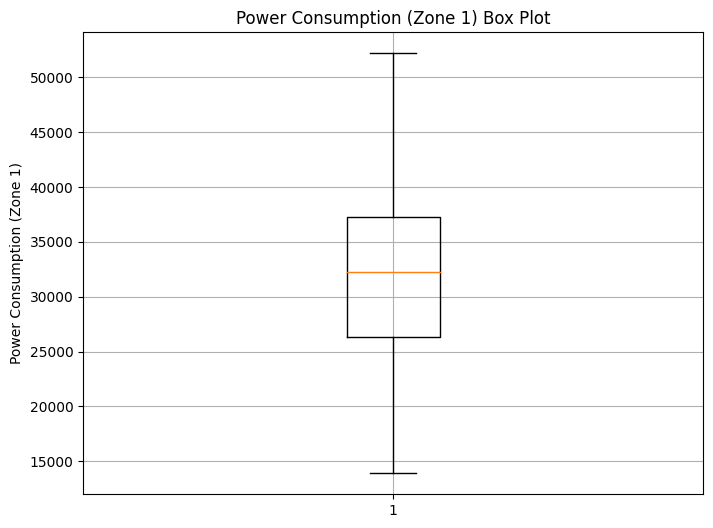

In [9]:
# Plot 3: Box plot to visualize the spread and outliers of power consumption
plt.figure(figsize=(8, 6))
plt.boxplot(df['PowerConsumption_Zone1'])
plt.ylabel('Power Consumption (Zone 1)')
plt.title('Power Consumption (Zone 1) Box Plot')
plt.grid(True)
plt.show()

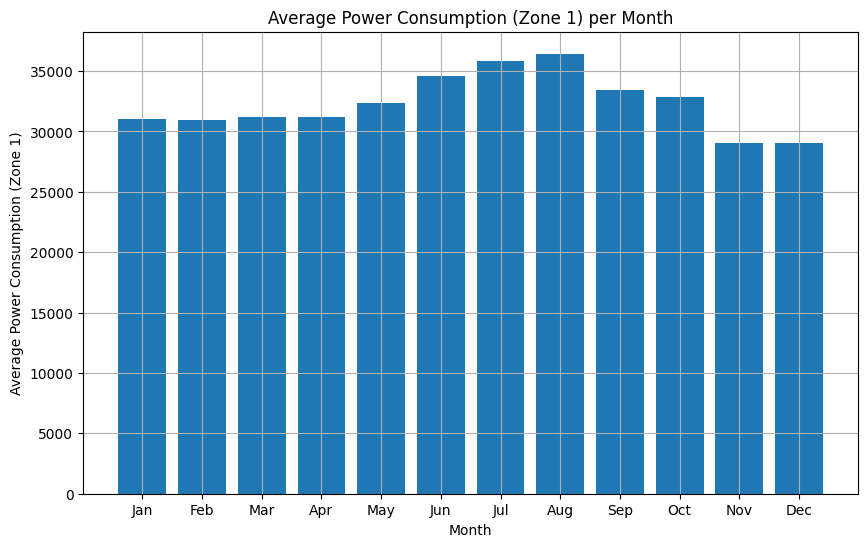

In [10]:
# Plot 4: Bar plot for average power consumption per month
df['Month'] = df['Datetime'].dt.month
monthly_avg_consumption = df.groupby('Month')['PowerConsumption_Zone1'].mean()

plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_consumption.index, monthly_avg_consumption.values)
plt.xlabel('Month')
plt.ylabel('Average Power Consumption (Zone 1)')
plt.title('Average Power Consumption (Zone 1) per Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [11]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [12]:
import pandas as pd
import plotly.express as px

In [13]:
df[categorical_cols].describe()

,Datetime
count,52416
mean,2017-07-01 23:55:00
min,2017-01-01 00:00:00
25%,2017-04-01 23:57:30
50%,2017-07-01 23:55:00
75%,2017-09-30 23:52:30
max,2017-12-30 23:50:00


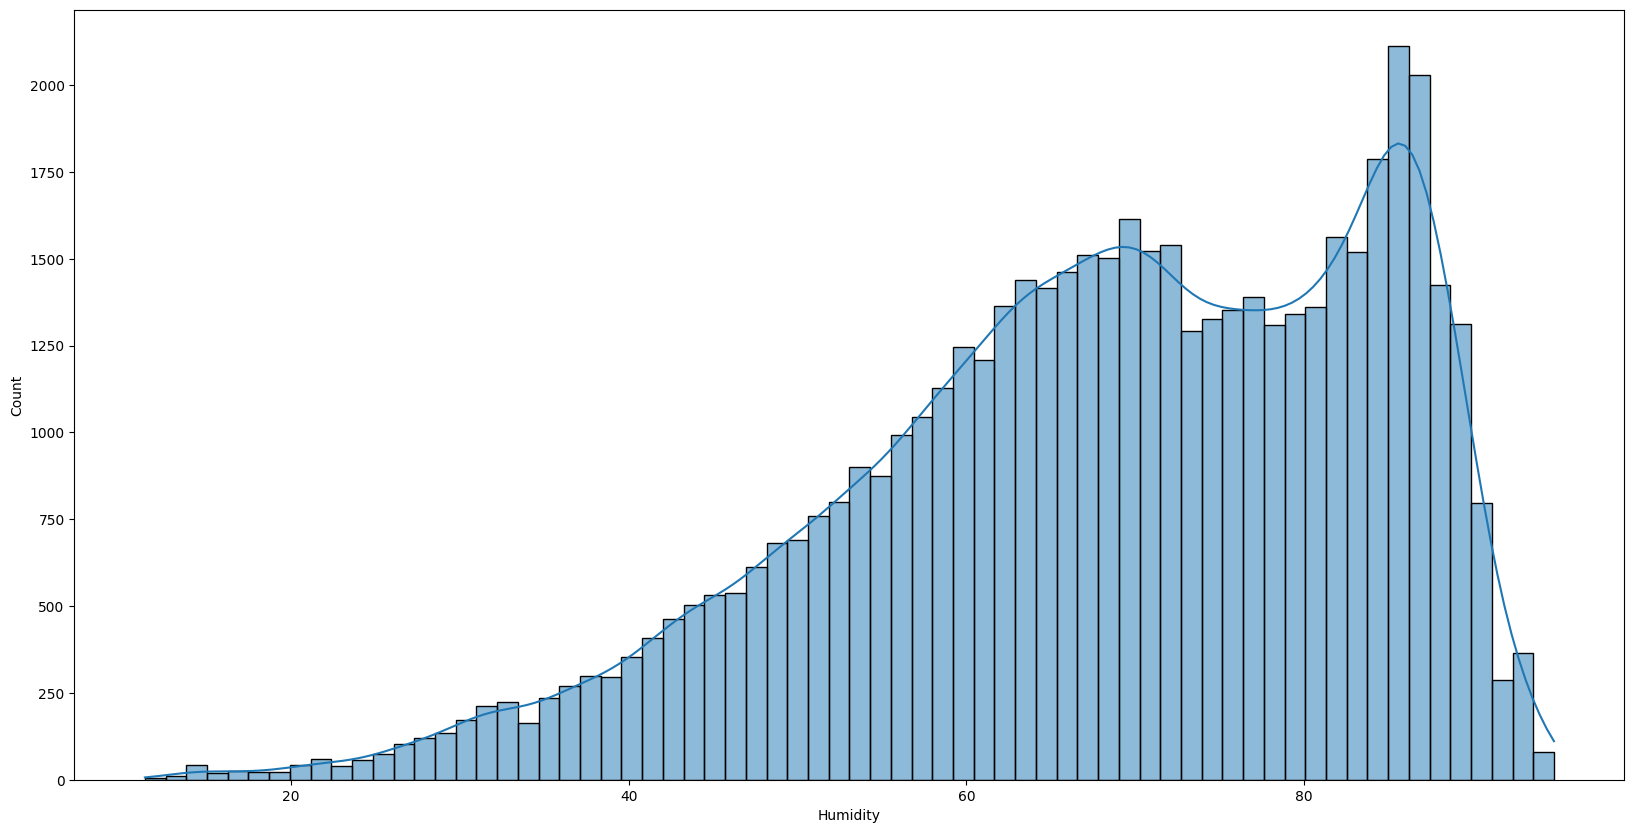

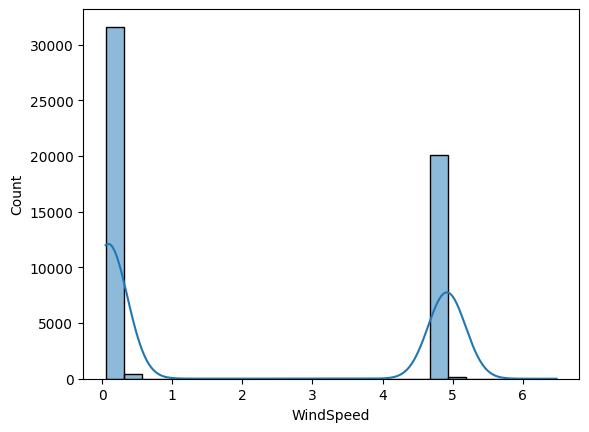

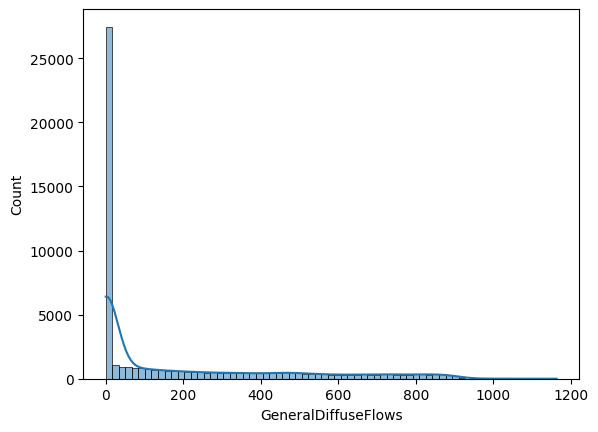

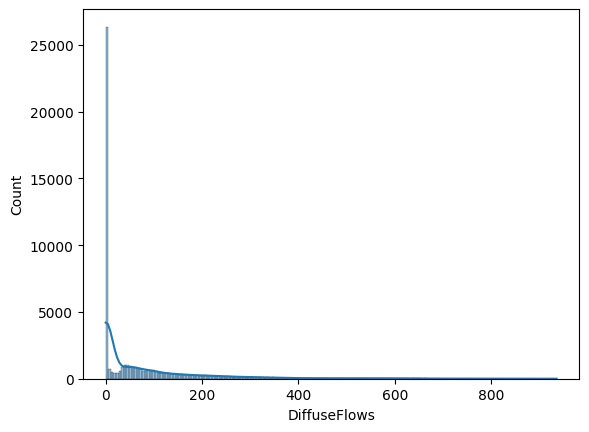

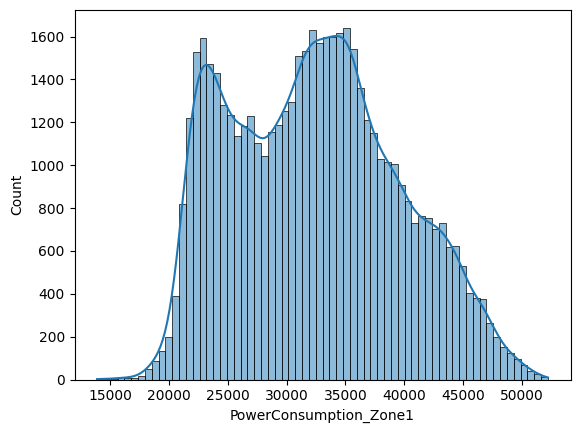

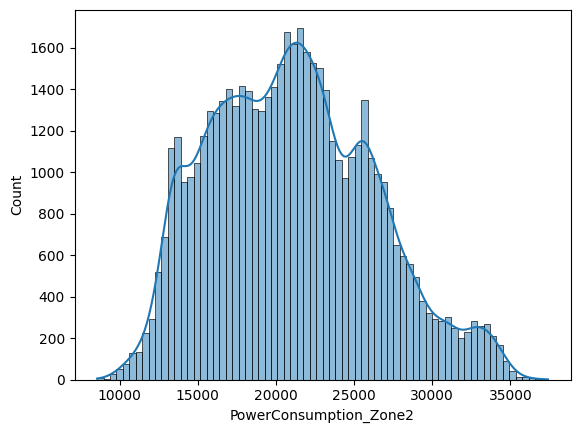

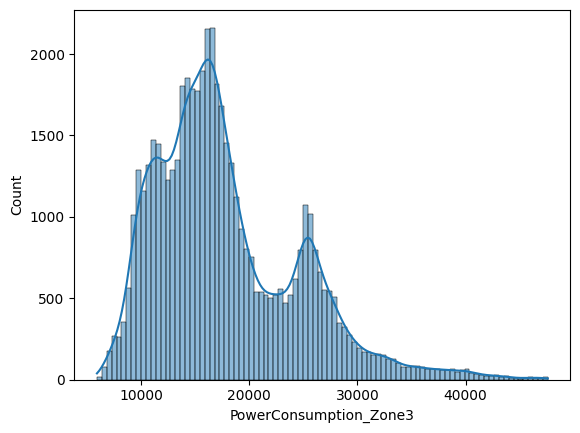

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
x=0
for i in numerical_cols:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

<Axes: >

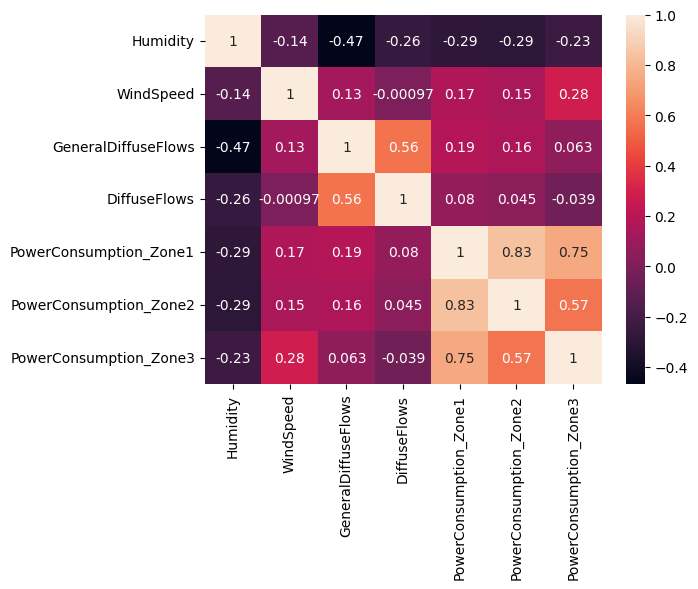

In [15]:
## correlation
sns.heatmap(df[numerical_cols].corr(),annot=True)

In [16]:
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Month
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1


## Model Training

In [17]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Your categorized data
data = {
    'Temperature_Category': ['Medium', 'Medium', 'Medium', 'Medium', 'Low'],
    'Humidity_Category': ['High', 'High', 'High', 'High', 'High'],
    'WindSpeed_Category': ['Low', 'Low', 'Low', 'Low', 'Low'],
    'GeneralDiffuseFlows_Category': ['Low', 'Low', 'Low', 'Medium', 'Low'],
    'DiffuseFlows_Category': ['Medium', 'Low', 'Medium', 'Medium', 'Low'],
    'PowerConsumption_Zone1_Category': ['High', 'Medium', 'Medium', 'Low', 'Low'],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Target variable
y = df['PowerConsumption_Zone1_Category']

# Drop the target variable from the features
X = df.drop(columns=['PowerConsumption_Zone1_Category'])

# Now, convert X and y to numpy arrays
X = X.to_numpy()
y = y.to_numpy()


In [19]:
print(X.shape)  # Should be (number of samples, number of features)
print(y.shape)  # Should be (number of samples,)

(5, 5)
(5,)


In [20]:
# Define the custom ranking for each ordinal variable
Temperature_Category: ['Low', 'Medium', 'High']
Humidity_Category: ['Low', 'Medium', 'High']
WindSpeed_Category: ['Low', 'Medium', 'High']

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Read the CSV file into a DataFrame
df = pd.read_csv("powerconsumption.csv")

# Target variable
y = df['PowerConsumption_Zone1']  # Assuming 'PowerConsumption_Zone1' is the target column

# Drop the target variable and other irrelevant columns from the features
X = df.drop(columns=['PowerConsumption_Zone1', 'Datetime'])  # Remove 'Datetime' if it's not relevant

# Perform label encoding for categorical features
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.30, random_state=30)


In [22]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [23]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [24]:
## Train multiple models
## Model Ecaluation
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')
    
    predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

    predictions_df.to_csv(f'{model}_predictions.csv', index=False)

LinearRegression
Model Training Performance
RMSE: 2869.5756459061613
MAE: 2277.4838126372792
R2 score 83.89788527263183


Lasso
Model Training Performance
RMSE: 2869.575629846672
MAE: 2277.4839186971076
R2 score 83.89788545286177


Ridge
Model Training Performance
RMSE: 2869.575645905909
MAE: 2277.4838126382097
R2 score 83.89788527263467


Elasticnet
Model Training Performance
RMSE: 2869.575633120419
MAE: 2277.483882720635
R2 score 83.89788541612168




In [25]:
linear_regression_predictions = pd.read_csv('LinearRegression()_predictions.csv')
lasso_predictions = pd.read_csv('Lasso()_predictions.csv')
ridge_predictions = pd.read_csv('Ridge()_predictions.csv')
elasticnet_predictions = pd.read_csv('Elasticnet()_predictions.csv')

In [26]:
print("Linear Regression Predictions:")
print(linear_regression_predictions)

print("\nLasso Predictions:")
print(lasso_predictions)

print("\nRidge Predictions:")
print(ridge_predictions)

print("\nElasticnet Predictions:")
print(elasticnet_predictions)

Linear Regression Predictions:
            Actual     Predicted
0      29067.01987  24366.230808
1      32896.28009  36973.410588
2      31243.05648  36330.775323
3      37548.31858  32585.983972
4      39079.77802  43026.054111
...            ...           ...
15720  45702.29508  42113.268681
15721  48841.73141  45534.665034
15722  22110.76923  24118.054220
15723  38776.14639  38350.031950
15724  42975.18987  41424.170783

[15725 rows x 2 columns]

Lasso Predictions:
            Actual     Predicted
0      29067.01987  24366.226741
1      32896.28009  36973.406372
2      31243.05648  36330.781328
3      37548.31858  32585.988954
4      39079.77802  43026.059627
...            ...           ...
15720  45702.29508  42113.273089
15721  48841.73141  45534.668358
15722  22110.76923  24118.051933
15723  38776.14639  38350.027488
15724  42975.18987  41424.165224

[15725 rows x 2 columns]

Ridge Predictions:
            Actual     Predicted
0      29067.01987  24366.230807
1      32896.28009 

In [27]:
all_predictions = pd.concat([
    linear_regression_predictions,
    lasso_predictions,
    ridge_predictions,
    elasticnet_predictions
], axis=0)

all_predictions.to_csv('combined_predictions.csv', index=False)

print(all_predictions)

            Actual     Predicted
0      29067.01987  24366.230808
1      32896.28009  36973.410588
2      31243.05648  36330.775323
3      37548.31858  32585.983972
4      39079.77802  43026.054111
...            ...           ...
15720  45702.29508  42113.272256
15721  48841.73141  45534.667159
15722  22110.76923  24118.052055
15723  38776.14639  38350.028077
15724  42975.18987  41424.167253

[62900 rows x 2 columns]


In [28]:
linear_regression_predictions.rename(columns={'Predicted': 'LinearRegression_Predicted'}, inplace=True)
lasso_predictions.rename(columns={'Predicted': 'Lasso_Predicted'}, inplace=True)
ridge_predictions.rename(columns={'Predicted': 'Ridge_Predicted'}, inplace=True)
elasticnet_predictions.rename(columns={'Predicted': 'Elasticnet_Predicted'}, inplace=True)


all_predictions = pd.concat([linear_regression_predictions, lasso_predictions, ridge_predictions, elasticnet_predictions], axis=1)

print(all_predictions)

all_predictions.to_csv('all_model_predictions.csv', index=False)

            Actual  LinearRegression_Predicted       Actual  Lasso_Predicted  \
0      29067.01987                24366.230808  29067.01987     24366.226741   
1      32896.28009                36973.410588  32896.28009     36973.406372   
2      31243.05648                36330.775323  31243.05648     36330.781328   
3      37548.31858                32585.983972  37548.31858     32585.988954   
4      39079.77802                43026.054111  39079.77802     43026.059627   
...            ...                         ...          ...              ...   
15720  45702.29508                42113.268681  45702.29508     42113.273089   
15721  48841.73141                45534.665034  48841.73141     45534.668358   
15722  22110.76923                24118.054220  22110.76923     24118.051933   
15723  38776.14639                38350.031950  38776.14639     38350.027488   
15724  42975.18987                41424.170783  42975.18987     41424.165224   

            Actual  Ridge_Predicted    

## List of Models Used

In [29]:
model_list

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet']

In [30]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [31]:
data_linear = pd.read_csv('LinearRegression()_predictions.csv')
data_elastic = pd.read_csv('ElasticNet()_predictions.csv')

# Create scatter plot for comparison
scatter_fig = px.scatter(data_linear, x='Actual', y='Predicted', title='Linear Regression Predictions')
scatter_fig.add_scatter(x=data_elastic['Actual'], y=data_elastic['Predicted'], mode='markers', name='ElasticNet Predictions')

# Create line plot for comparison
line_fig = px.line(data_linear, x='Actual', y='Predicted', title='Linear Regression Predictions')
line_fig.add_scatter(x=data_elastic['Actual'], y=data_elastic['Predicted'], mode='lines', name='ElasticNet Predictions')

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Scatter Plot Comparison', 'Line Plot Comparison'))

# Add scatter plot to subplot 1
for trace in scatter_fig.data:
    fig.add_trace(trace, row=1, col=1)

# Add line plot to subplot 2
for trace in line_fig.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout
fig.update_layout(showlegend=True)  # Set showlegend to True to display legends

# Show the combined plot
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed